# Analysis by Prisca

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
df=pd.read_csv(r'C:\Users\USER\Documents\dataset\predictive_maintenance_dataset.csv')

In [96]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


# Aim of this project
## A company has a fleet of devices transmitting daily sensor readings.
## They would like to create a predictive maintenance solution to proactively identify when maintenance should be performed. 
## This approach promises cost savings over routine or time based preventive maintenance, because tasks are performed only when warranted.
## The task is to build a predictive model using machine learning to predict the probability of a device failure. When building this model, 
## be sure to minimize false positives and false negatives. The column you are trying to Predict is called failure with binary value 0 for non-failure and 1 for failure.


In [142]:
df.info() # dataset informations

<class 'pandas.core.frame.DataFrame'>
Index: 124493 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124493 non-null  object
 1   device   124493 non-null  object
 2   failure  124493 non-null  int64 
 3   metric1  124493 non-null  int64 
 4   metric2  124493 non-null  int64 
 5   metric3  124493 non-null  int64 
 6   metric4  124493 non-null  int64 
 7   metric5  124493 non-null  int64 
 8   metric6  124493 non-null  int64 
 9   metric7  124493 non-null  int64 
 10  metric8  124493 non-null  int64 
 11  metric9  124493 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 12.3+ MB


In [99]:

df.duplicated().sum() # 1 duplicates found

1

In [100]:
df_dup=df.drop_duplicates(inplace=True)

In [101]:
df.isnull().sum() # no null values


date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [143]:
df_m=df[[ 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7',  'metric9']] # selecting needed features

In [144]:
df_m.head(2) # visulaizing it

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0


In [105]:
df_m['failure'].unique()

array([0, 1], dtype=int64)

# feature correlation

In [106]:
df_c=df_m[['failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7',  'metric9']]

In [107]:
df_cr=df_c.corr()

In [108]:
df_cr

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
failure,1.000000,0.001984,0.052901,-0.000949,0.067398,0.002270,-0.000550,0.119055,0.001066
metric1,0.001984,1.000000,-0.004253,0.003702,0.001836,-0.003373,-0.001518,0.000151,-0.002256
metric2,0.052901,-0.004253,1.000000,-0.002617,0.146762,-0.013999,-0.026350,0.141366,-0.002049
metric3,-0.000949,0.003702,-0.002617,1.000000,0.097452,-0.006697,0.009030,-0.001884,0.369579
metric4,0.067398,0.001836,0.146762,0.097452,1.000000,-0.009773,0.024870,0.045631,0.024892
metric5,0.002270,-0.003373,-0.013999,-0.006697,-0.009773,1.000000,-0.017051,-0.009384,0.003591
metric6,-0.000550,-0.001518,-0.026350,0.009030,0.024870,-0.017051,1.000000,-0.012207,0.016566
metric7,0.119055,0.000151,0.141366,-0.001884,0.045631,-0.009384,-0.012207,1.000000,0.004684
metric9,0.001066,-0.002256,-0.002049,0.369579,0.024892,0.003591,0.016566,0.004684,1.000000


<Axes: >

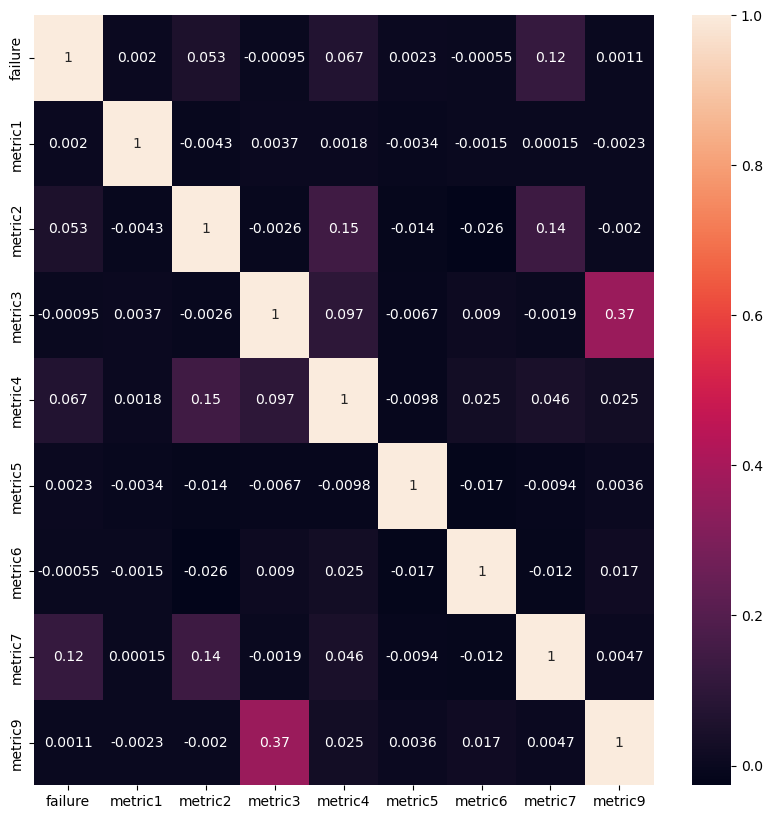

In [145]:
plt.figure(figsize=(10,10)) #visualizing correlation
sns.heatmap(df_cr,annot=True)

# Resampling the dataset for better result

In [110]:
from sklearn.utils import resample

In [111]:
fail=df_m['failure'].value_counts()

<Axes: xlabel='failure', ylabel='count'>

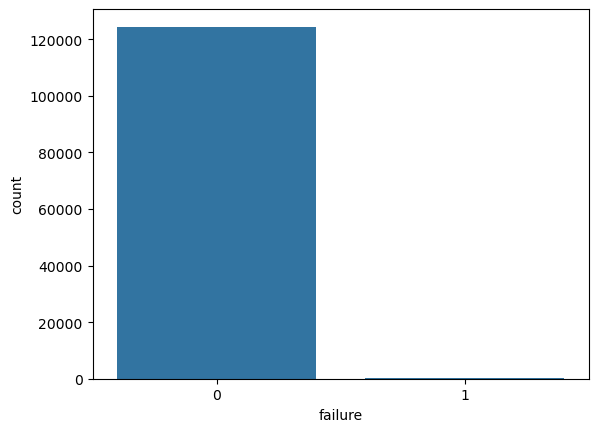

In [112]:
sns.barplot(fail)

In [113]:
df_major=df_m[(df_m['failure']==0)]
df_minor= df_m[(df_m['failure']==1)] # filtering the categprical variable

In [114]:
res=resample(df_minor,replace=True,n_samples=124387,random_state=42)

In [115]:
res

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
114251,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,11
72769,Z1F148T1,1,134062824,0,0,9,8,198466,80,0
104223,W1F11ZG9,1,32671632,368,9,486,3,344433,0,1
16475,Z1F1FCH5,1,163342800,0,0,6,7,239297,24,0
83531,S1F0PJJW,1,193618832,0,0,0,8,270050,0,0
...,...,...,...,...,...,...,...,...,...,...
78596,S1F0F4EB,1,243261216,0,0,0,10,255731,0,3
15773,S1F023H2,1,64499464,0,0,1,19,514661,16,3
27798,Z1F0LVGY,1,184775672,0,0,0,7,320227,24,0
100915,Z1F0P16F,1,93368288,1176,0,0,7,304990,0,2


In [116]:
res['failure'].value_counts()

failure
1    124387
Name: count, dtype: int64

In [117]:
df_sam=pd.concat([df_major,res]) # adding the resample and the majority value together

In [118]:
df_sam.head() #resample data

,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [119]:
resample=df_sam['failure'].value_counts()

<Axes: xlabel='failure', ylabel='count'>

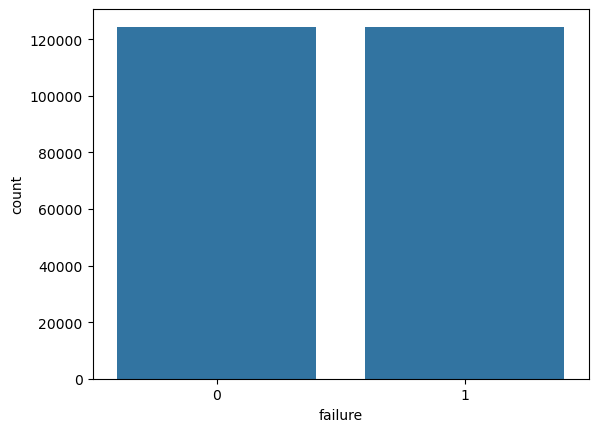

In [120]:
sns.barplot(resample) # both categorical variable are now equal

# Model Building

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [122]:
le=LabelEncoder()
df_sam['device']=le.fit_transform(df_sam['device'])

In [123]:
x=df_sam[[ 'device', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7',  'metric9']]
y=df_sam['failure']

In [124]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x) #feature scaling

In [125]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42) # training

In [126]:
rn= RandomForestClassifier(ccp_alpha=0.002) #fitting into the model
rn.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.002)

In [127]:
rn.score(x_train,y_train) # the model fitting score

0.973699473415221

In [128]:
rn_pred=rn.predict(x_test)

In [129]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [130]:
metrics.accuracy_score(y_test,rn_pred) # accuracy evaluation

0.973362989562258

In [131]:
cm=confusion_matrix(y_test,rn_pred)
cm # evaluating the accuracy usuing confusion matrix

array([[35210,  1988],
       [    0, 37435]], dtype=int64)

<Axes: >

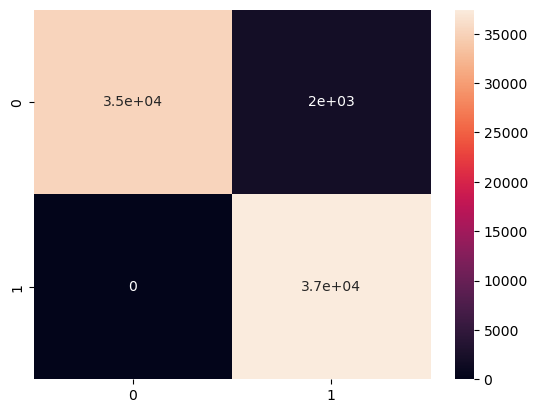

In [132]:
sns.heatmap(cm,annot=True)

In [133]:
feature=rn.feature_importances_
lab=[ 'device', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7',  'metric9'] # determining the features that contribute best to the prediction

<Axes: >

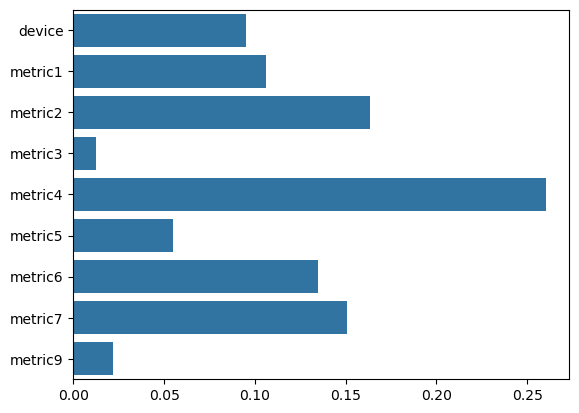

In [134]:
sns.barplot(x=feature,y=lab)
# the feature or column that contribute the most if metric4, metric 3 and 9 is the least, you can safel remove metrics 3 and 9,
## but am gona leav it as it is

# validation

In [135]:
from sklearn.model_selection import KFold ,cross_val_score

In [136]:
kf=KFold(n_splits=5)
score=cross_val_score(rn,x_train,y_train,cv=kf)

In [137]:
score # validating the model to ensure no overfitting

array([0.97631284, 0.97461812, 0.97530722, 0.9731825 , 0.97507752])

In [138]:
# prediction

In [139]:
x_new=le.fit_transform(['S1F01E6Y',	173295968,	0,	0,	0,	12,	237394,	0,	0])

In [140]:
prediction=rn.predict(scaler.transform([x_new])) # correctly predicted
if prediction==0:
    print('not failing')
else:
    print('failed')

not failing


# Conclusion:
## model has accuracy of 97% for the prediction of the probability of machine failures